In [1]:
import sqlite3
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from data_exploration.helper import (
                                        fetch_table,
                                        reshape_land_cover_data,
                                        prepare_data_for_maps,
                                        aggregate_average_change
                                    )

from data_exploration.visualization import (
                                                plot_average_change,
                                                plot_overall_average_temperature_change,
                                                plot_compare_countries_temperature_trend,
                                                plot_average_value_map,
                                                plot_column_over_years
                                            )

# Table #1: Annual_Surface_Temperature_Change

In [2]:
db_path = '../data/climate_data_final.db'
conn = sqlite3.connect(db_path)

table_name = 'Annual_Surface_Temperature_Change'
annual_surface_temp_change_df = fetch_table(conn, table_name)

print(f"Table: {table_name}")

conn.close()
annual_surface_temp_change_df.head()


Table: Annual_Surface_Temperature_Change


,Country,ISO3,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,...,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498
1,Albania,ALB,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,...,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498
2,Algeria,DZA,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,...,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926
3,American Samoa,ASM,0.344,-0.069,0.189,0.755,0.784,NaN,NaN,0.242,...,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430
4,"Andorra, Principality of",AND,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,...,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562


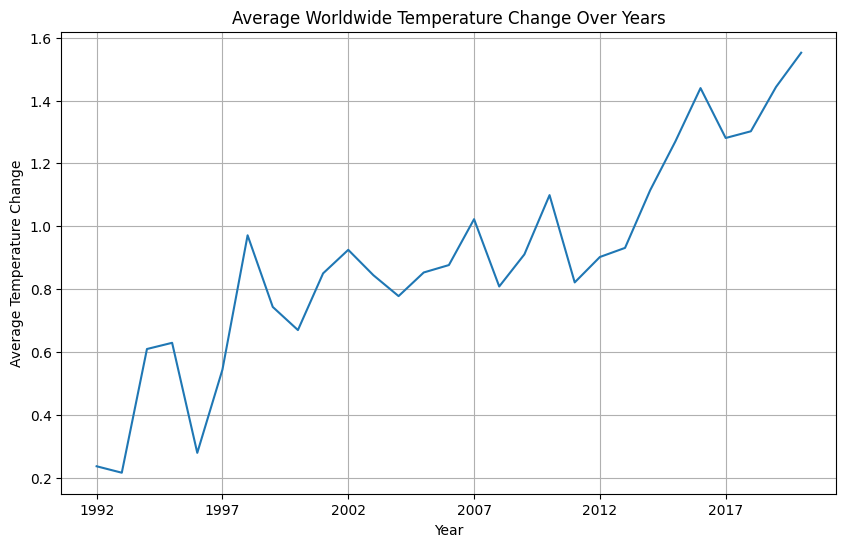

In [3]:
avg_change = aggregate_average_change(annual_surface_temp_change_df)
plot_average_change(avg_change, "Temperature")

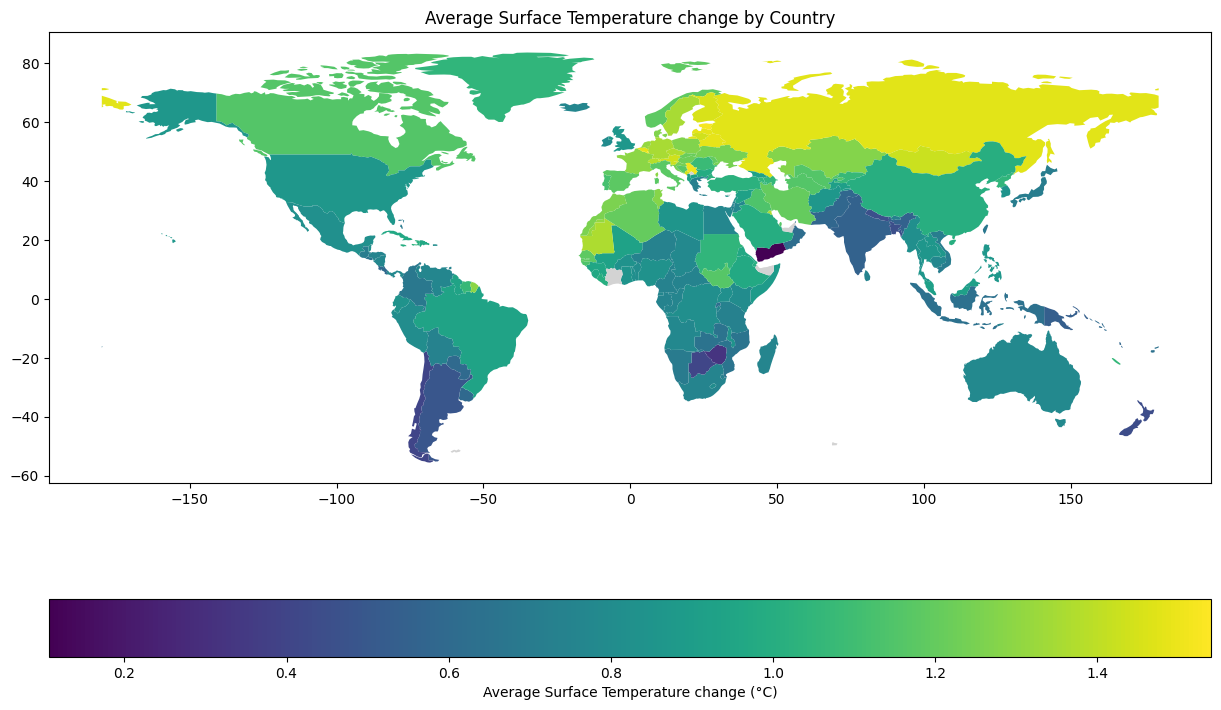

In [4]:
merged_data = prepare_data_for_maps(annual_surface_temp_change_df,2)

plot_average_value_map(merged_data, label_and_unit="Average Surface Temperature change (°C)")

# Table # 2: Land_Cover_Alteration

In [5]:
db_path = '../data/climate_data_final.db'
conn = sqlite3.connect(db_path)

table_name = 'Land_Cover_Alteration'
land_cover_alteration_df = fetch_table(conn, table_name)
print(f"Table: {table_name}")
conn.close()

land_cover_alteration_df.head()

Table: Land_Cover_Alteration


,Country,ISO3,Indicator,Unit,Climate_Influence,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Advanced Economies,AETMP,Climate Altering Land Cover Index,Index,Climate altering,95.942016,97.027517,97.030493,97.339731,97.462165,...,99.903233,99.963105,99.978710,99.996285,100.0,100.010114,100.076907,100.229096,100.355972,100.394188
1,Advanced Economies excluding US,EAEUSTMP,Climate Altering Land Cover Index,Index,Climate altering,94.851414,96.800658,96.767106,97.090049,97.172806,...,100.051718,100.104101,100.069837,100.032246,100.0,99.979035,100.007709,99.995467,100.020988,100.058737
2,Africa,AFRTMP,Climate Altering Land Cover Index,Index,Climate altering,91.590697,93.557008,93.500134,94.266184,94.532599,...,98.793984,100.076777,100.086539,99.972989,100.0,99.840223,99.802754,99.725391,99.758857,99.864541
3,Americas,AMETMP,Climate Altering Land Cover Index,Index,Climate altering,92.924554,93.023248,92.940142,94.263051,94.632936,...,99.025837,99.287572,99.647269,99.784025,100.0,100.229617,100.753590,100.902233,100.997645,101.013420
4,Asia,ASIATMP,Climate Altering Land Cover Index,Index,Climate altering,100.417597,100.022963,99.578377,99.613406,99.621526,...,100.133256,99.990573,99.915897,100.009021,100.0,99.723557,99.729292,99.847777,99.709031,99.730813


In [6]:
reshaped_df = reshape_land_cover_data(land_cover_alteration_df)
merged_data_land = prepare_data_for_maps(reshaped_df,3)

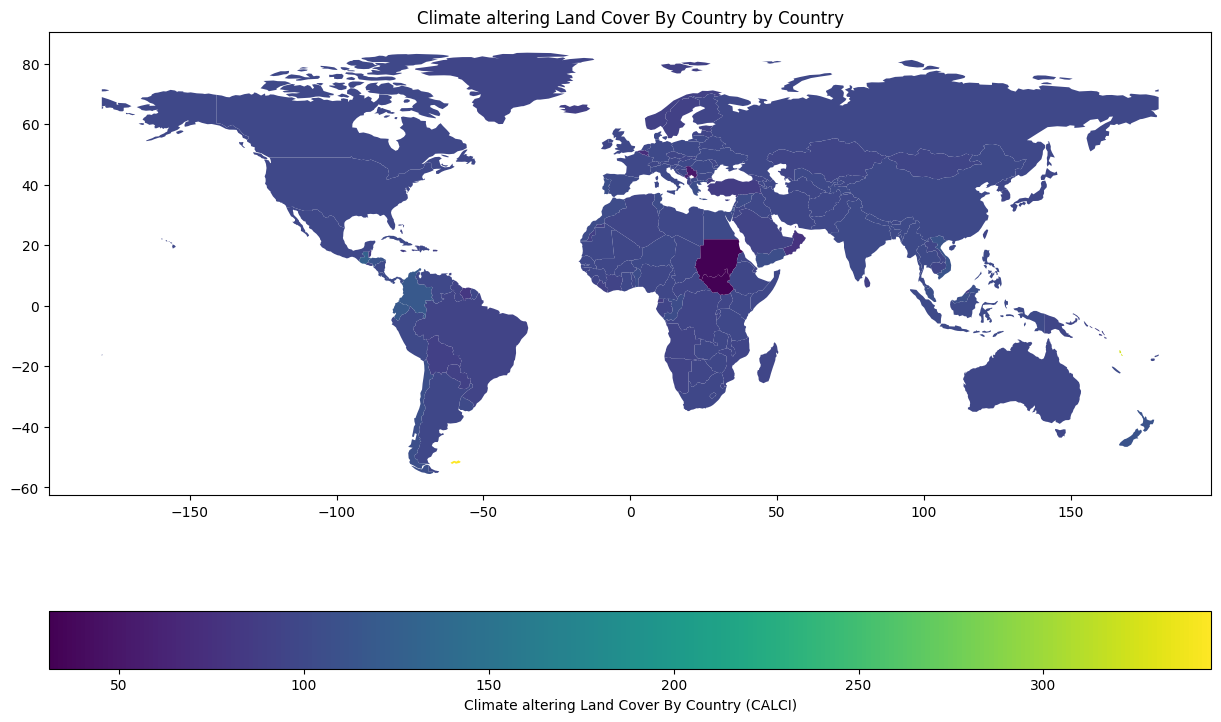

In [7]:
plot_average_value_map(merged_data_land[merged_data_land["Climate_Influence"]=="Climate altering"], 
                                        label_and_unit="Climate altering Land Cover By Country (CALCI)")

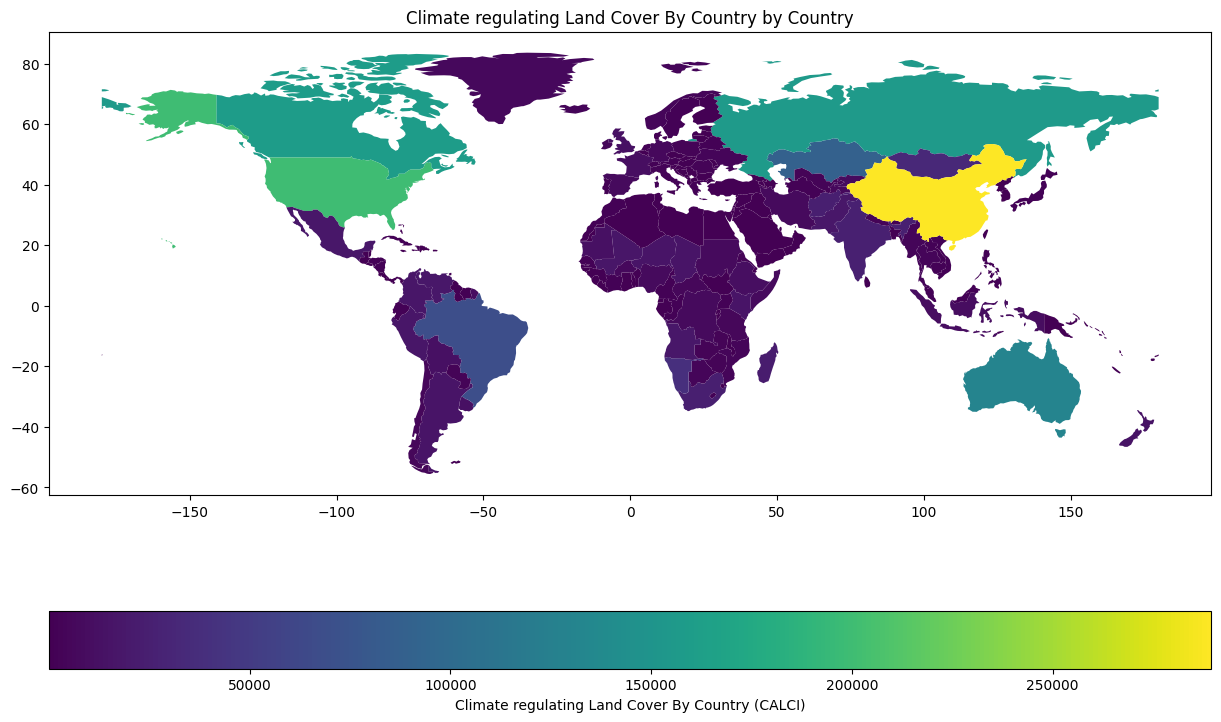

In [8]:
plot_average_value_map(merged_data_land[merged_data_land["Climate_Influence"]=="Climate regulating"], 
                                        label_and_unit="Climate regulating Land Cover By Country (CALCI)")

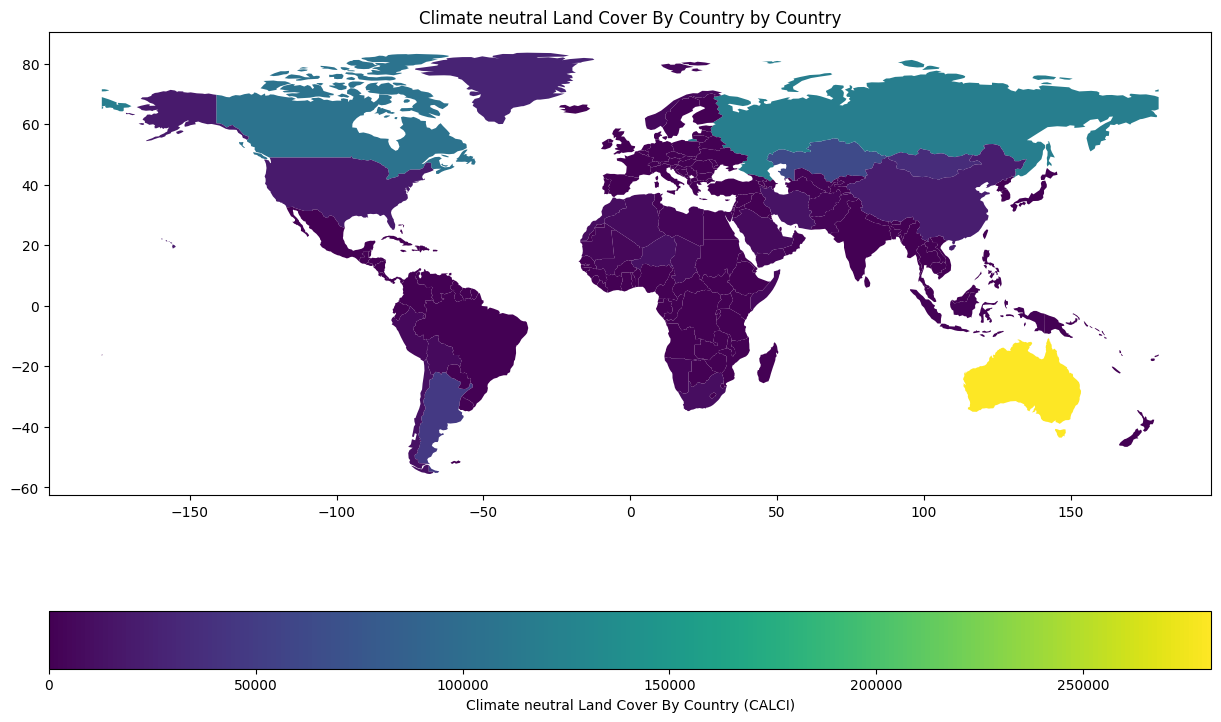

In [9]:
plot_average_value_map(merged_data_land[merged_data_land["Climate_Influence"]=="Climate neutral"], 
                                        label_and_unit="Climate neutral Land Cover By Country (CALCI)")

# Table # 3: World Monthly CO2 Concentrations

In [10]:
db_path = '../data/climate_data_final.db'
conn = sqlite3.connect(db_path)

table_name = 'World_Monthly_CO2_Concentrations'
monthly_co2_concentrations_df = fetch_table(conn, table_name)
print(f"Table: {table_name}")
conn.close()

monthly_co2_concentrations_df.head()

Table: World_Monthly_CO2_Concentrations


,Country,Unit,Date,Value
0,World,Parts Per Million,1958-03-01 00:00:00,315.70
1,World,Parts Per Million,1958-04-01 00:00:00,317.45
2,World,Parts Per Million,1958-05-01 00:00:00,317.51
3,World,Parts Per Million,1958-06-01 00:00:00,317.24
4,World,Parts Per Million,1958-07-01 00:00:00,315.86


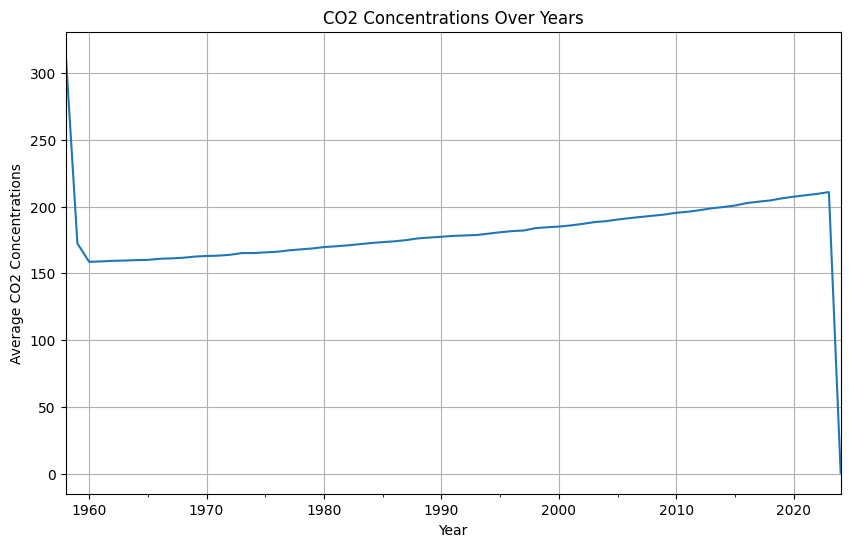

In [11]:
plot_column_over_years(monthly_co2_concentrations_df, 'Date', 'Value', 'CO2 Concentrations')

# Table # 4: Change in Mean Sea Levels

In [12]:
db_path = '../data/climate_data_final.db'
conn = sqlite3.connect(db_path)

table_name = 'Change_in_Mean_Sea_Levels'
mean_sea_levels_df = fetch_table(conn, table_name)
print(f"Table: {table_name}")
conn.close()

mean_sea_levels_df.head(30)

Table: Change_in_Mean_Sea_Levels


,Country,Measure,Date,Value
0,World,Andaman Sea,1992-12-17 00:00:00,-10.34
1,World,Arabian Sea,1992-12-17 00:00:00,-18.46
2,World,Atlantic Ocean,1992-12-17 00:00:00,-15.41
3,World,Baltic Sea,1992-12-17 00:00:00,196.85
4,World,Bay Bengal,1992-12-17 00:00:00,3.27
5,World,Caribbean Sea,1992-12-17 00:00:00,-13.58
6,World,Gulf Mexico,1992-12-17 00:00:00,-3.95
7,World,Indian Ocean,1992-12-17 00:00:00,-27.63
8,World,Indonesian,1992-12-17 00:00:00,-3.09
9,World,Mediterranean,1992-12-17 00:00:00,39.02


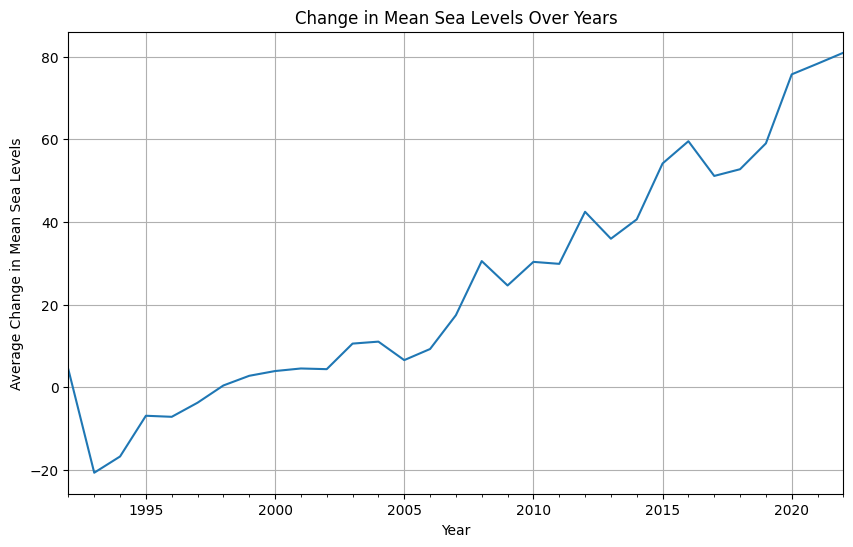

In [13]:
plot_column_over_years(mean_sea_levels_df, 'Date', 'Value', 'Change in Mean Sea Levels')